# List Full Names of all the participants in your team below:
1.  sagarika suresh
2.  michael murphy 
3. surya muthiah pillai
4. gowtham rajasekaran
5. faizaan arshad
6. xianxin lin
7. shuoling li
8. 
9. 
10. 
11. 

Hello Machine Learning Engineer Drepung Team, 

You have been given a **Banknote Authentication Dataset** from UCI data repository. The data features were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features (f1,f2,f3) from images.

Number of Instances: 1372 <br>
Number of Attributes: 5 (including the target variable `y`)

Attribute Information: 
   * **y:**  Forged or not (0 Forged or +1 Not Forged)
   * **f1:** variance of Wavelet Transformed image (continuous)
   * **f2:** skewness of Wavelet Transformed image (continuous)
   * **f3:** curtosis of Wavelet Transformed image (continuous)
   * **f4:** entropy of image (continuous)

There are no missing Attribute Values.

Your task is to implement a **Iterative Reweighted Least Squares Approach for Logistic Regression** for predicting given a banknote is forged or not.




## Iterative reweighted least squares
The **Genesis Equation** for Logistic Regression Model is of the form:

$\hat{y}(x,w) = \sigma (w^{T}.x)$  <br>

* $\hat{y}(x,w)$ is predicted output,
* $x$ is the aumented Input (augmented with unit vector column)
* $w = [w_{0}, w_{1}, w_{2}, .. , w_{F}]$ are the parameters to be learned from training samples with $F$ Features
* $t_{n}$ is the target variable (truth label)

The **Loss Function** for Logistic Regression Model is of the form: <br>

$E(w) = -\Sigma_{n=1}^{N} [t_{n} \log {\hat{y}_{n}} + (1 - t_{n}) \log {(1 - \hat{y}_{n}})]$

The **Newton-Raphson update**, for minimizing a function E(w), takes the form

$w^{new} = w^{old} - H^{-1} \Delta E(w) $ <br>
Where H is the Hessian matrix whose elements comprise the second derivative with respect to the components of w.

Applying the Newton-Raphson update to the binary-cross-entropy error function
for the logistic regression model. We see that the gradient and
Hessian of this error function are given by: <br>

$\Delta E(w) = \Sigma^{N}_{n = 1} (\hat{y}_{n} - t_{n})x_{n} = x^{T} (\hat{y} - t)$ <br>

$H = \Delta \Delta E(w) = \Sigma^{N}_{n = 1} \hat{y}_{n}(1 - \hat{y}_{n})x_{n}x_{n}^{T} = x^{T}Rx$

Where $R$ is a NxN diagonal matrix with elements $R_{nn} = \hat{y}_{n}(1 - \hat{y}_{n})$

The Newton-Raphson update formula for the logistic regression model then becomes: <br>
$w^{new} = w^{old} - (x^{T}Rx)^{-1}x^{T}(\hat{y} - t) $ <br>
$w^{new} = (x^{T}Rx)^{-1} (x^{T}Rxw^{old} - x^{T}(\hat{y} - t)) $ <br>
$w^{new} = (x^{T}Rx)^{-1}x^{T}Rz$ <br>
Where z is an N-dimensional vector with elements <br>
$z = xw^{old} - R^{-1}(\hat{y} - t)$

Because the weighing matrix R is not constant but depends on the parameter vector w, we must apply the normal equations iteratively, each time using the new weight vector w to compute a revised weighing matrix R. For this reason, the algorithm is known as iterative reweighted least squares, or IRLS.

YOU NEED TO IMPLEMENT an iterative solution to solve for $w$ (IRLS) 

<font color="red">DO NOT USE SKLEARNS LIBRARY DIRECTLY.</font>

### **Question:** In the following code cell implement the following:
* Step 1: Import the dataset using Pandas Dataframe (Step 1 Implemented already)
* Step 2: Partition your dataset into training testing and validation using sklearns train_test_split library and split the features and target labels into seperate variables (Step 2 Implemented already)
* Step 3: Scale the features using sklearns min max scaling function (Step 3 Implemented already)
* Step 4: Convert Scaled Features and Labels into numpy arrays with dimensions required by closed form solution (Step 4 Implemented already)
* Step 5: Augment scalend trained, val and test features with unit vectors.(Step 5 Implemented already)
* Step 6: Initialize the learning rate, number of epochs, weight vector and other variables required for tracking cost. (Already implemented)
* Step 7: Train with Training Dataset using IRLS Solution
  Iteratively update the weights and biases for each epoch using:
  * Step 7.1: Use genesis equation $\hat{y} = \Sigma(W^{T}.X)$ where $W$ is the weight array agumented with bias, $X$ is the input features augmented with unit vector and $\hat{y}$ is the predicted value. (You will have to perform same operation on validation set as well)
  * Step 7.2: Find BCE Cost (L) for training and validation set using predicted value $\hat{y}$ and truth value $y$
    * BCE Cost = $-\Sigma_{n=1}^{N} [t_{n} \log {\hat{y}_{n}} + (1 - t_{n}) \log {(1 - \hat{y}_{n}})]$
  * Step 7.3: Update $W$ as follows:
    - Step 7.3.1: Calculate, $R$ which is a NxN diagonal matrix with diagonal elements $R_{nn} = \hat{y}_{n}(1 - \hat{y}_{n})$
    - Step 7.3.2: Caculate, $z = w_{old}^{T}x - (\hat{y} - t)R^{-1}$
    - Step 7.3.3: Update, $w^{new} = (xRx^{T})^{-1}Rz^{T}$
  * Step 7.4: Store BCE Cost for training and validation in cost tracking lists
* Step 8: Plot validation and training cost vs number of epochs (Already Implemented)
* Step 9: Test using Testing Dataset
  * Step 9.1: Use genesis equation $\hat{y} = \sigma (W^{T}.X_{test})$ where $W$ is the augmented weight array, $X_{test}$ is the input test features agumented with unit vector and $\hat{y}$ is the predicted value.
  * Step 9.2: Calculate Accuracy using Sklearns.Metrics library.

In [3]:
# Step 1 already implemented
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/Mihir2/BreakoutSessionDataset/master/data_banknote_authentication_lr.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))
%matplotlib inline
# Step 2 already implemented
import numpy as np
from sklearn.model_selection import train_test_split
output = data['y']
input = data.to_numpy()[:,1:]
x_train, x_val_test, y_train, y_val_test = train_test_split(input, output, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.5)

# Step 3 already implemented
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_xtrain = scaler.fit_transform(x_train)
sc_xval = scaler.transform(x_val)
sc_xtest = scaler.transform(x_test)

# Step 4 already implemented
augment_xtrain = np.ones((sc_xtrain.shape[0],sc_xtrain.shape[1]+1))
augment_xtrain[:,1:] = sc_xtrain

augment_xval = np.ones((sc_xval.shape[0],sc_xval.shape[1]+1))
augment_xval[:,1:] = sc_xval

augment_xtest = np.ones((sc_xtest.shape[0],sc_xtest.shape[1]+1))
augment_xtest[:,1:] = sc_xtest

# Step 5 already implemented
y_train_arr = y_train.to_numpy().reshape(y_train.shape[0],1).T
x_train_arr = augment_xtrain.T
y_val_arr = y_val.to_numpy().reshape(y_val.shape[0],1).T
x_val_arr = augment_xval.T
y_test_arr  = y_test.to_numpy().reshape(y_test.shape[0],1).T
x_test_arr  = augment_xtest.T

# Step 6 already implemented
epochs = 100

number_of_features         = x_train_arr.shape[0]
number_of_train_datapoints = x_train_arr.shape[1]
number_of_val_datapoints   = x_val_arr.shape[1]
number_of_test_datapoints  = x_test_arr.shape[1]

weights = np.random.randn(number_of_features,1)*0.0001

training_cost_track = []
val_cost_track = []


### TA Response

In [4]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def binary_cross_entropy(pred_y, y, m):
    return -np.sum(np.multiply(np.log(pred_y), y) + np.multiply((1-y),np.log(1-pred_y)))/m

# Step 7
for epoch in range(epochs):
    
    # Step 7.1 y_pred = \sigmoid (wT.X + b) (For Training and Validation dataset)
    train_pred = sigmoid(np.dot(weights.T, x_train_arr))
    val_pred   = sigmoid(np.dot(weights.T, x_val_arr))

    # Step 7.2 BCE Cost for Training and Validation Dataset        
    train_cost = binary_cross_entropy(train_pred,y_train_arr,number_of_train_datapoints)
    val_cost = binary_cross_entropy(val_pred,y_val_arr,number_of_val_datapoints)
    
    # Step 7.3.1: Calculate R
    r_nn = np.multiply(train_pred,(1 - train_pred)).reshape(number_of_train_datapoints,)
    R = np.diag(r_nn)
    
    # Step 7.3.2: Calculate z
    z = np.dot(weights.T, x_train_arr) - np.dot((train_pred - y_train_arr),np.linalg.inv(R))

    # Step 7.3.2: Calculate w^{new}
    weights = np.dot(np.dot(np.dot(np.linalg.inv(np.dot(np.dot(x_train_arr,R),x_train_arr.T)),x_train_arr),R),z.T)

    # Step 7.4: Store perceptron cost for training and validation in seperate cost tracking list
    training_cost_track.append(train_cost)
    val_cost_track.append(val_cost)

### Student Response

In [ ]:
# Step 7
for epoch in range(epochs):
    
    # Step 7.1 y_pred = \sigmoid (wT.X + b) (For Training and Validation dataset)
    train_pred = np.dot(weights.T,x_train_arr)
    val_pred   = np.dot(weights.T,x_val_arr)
    train_pred=(1 / (1 + np.exp(-train_pred)))
    val_pred=(1 / (1 + np.exp(-val_pred)))

    # Step 7.2 BCE Cost for Training and Validation Dataset        
    train_cost = -np.sum(np.multiply(np.log(train_pred),y_train_arr) + np.multiply((1- y_train_arr), np.log(1 - train_pred)))/number_of_train_datapoints
    val_cost = -np.sum(np.multiply(np.log(val_pred),y_val_arr) + np.multiply((1- y_val_arr), np.log(1 - val_pred)))/number_of_val_datapoints
    
    # Step 7.3.1: Calculate R 
    #Step 7.3.1: Calculate,  𝑅  which is a NxN diagonal matrix with diagonal elements  𝑅𝑛𝑛=𝑦̂ 𝑛(1−𝑦̂ 𝑛) 
    r = np.multiply(train_pred,(1-train_pred))
    R=np.diag(np.squeeze(r)) #equations consistent
    # Step 7.3.2: Calculate z
    #Step 7.3.2: Caculate,  𝑧=𝑤𝑇𝑜𝑙𝑑𝑥−(𝑦̂ −𝑡)𝑅−1 
    z = np.dot(weights.T,x_train_arr)-np.dot((train_pred-y_train_arr),np.linalg.inv(R))

    # Step 7.3.3: Calculate w^{new}
    #Step 7.3.3: Update,  𝑤𝑛𝑒𝑤=(𝑥𝑅𝑥𝑇)−1𝑅𝑧𝑇
    weights = np.dot(np.dot(np.dot(np.linalg.inv(np.dot(np.dot(x_train_arr,R),x_train_arr.T)),x_train_arr),R),z.T)
   #weights=np.dot(np.dot(np.dot(np.linalg.inv(np.dot(np.dot(x_train_arr,R),x_train_arr.T)),x_train_arr),R),z.T)
    # Step 7.4: Store perceptron cost for training and validation in seperate cost tracking list
    training_cost_track.append(train_cost)
    val_cost_track.append(val_cost)

In [ ]:
train_pred.shape

(1, 1097)

In [ ]:
R.shape

(1097, 1097)

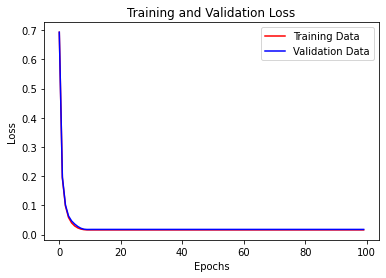

In [5]:
# Step 8: Plot MSE cost for training and validation set vs number of epochs (Already Implemented)
import matplotlib.pyplot as plt
plt.title('Training and Validation Loss')
plt.plot(training_cost_track, color='red', label='Training Data')
plt.plot(val_cost_track, color='blue', label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# Step 9.1: Test using Testing Dataset: Get the predicted values 
test_pred = np.dot(weights.T,x_test_arr)
test_pred=(1 / (1 + np.exp(-test_pred)))
test_pred=test_pred.round()
# Step 9.2 Calculate the Accuracy for Testing Dataset

from sklearn.metrics import accuracy_score

accuracy_score(test_pred.flatten(),y_test_arr.flatten())

0.9855072463768116